## Notebook Set-Up & Data Import ##

**Importing Packages & Source Datasets**

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
# import data
bachelors = pd.read_csv('bachelors.csv')
bachelorettes = pd.read_csv('bachelorettes.csv')
bachelor_contestants = pd.read_csv('bachelor-contestants.csv')
bachelorette_contestants = pd.read_csv('bachelorette-contestants.csv')

## Exploratory Data Analysis ##

**Preview Data Sets**

In the `bachelors` data set, each row contains data regarding the lead of a given season of 'The Bachelor'. The data set has columns for the name, age, hometown, height, and season number of each lead.

In [3]:
bachelors.head()

,Name,Age,Hometown,Height,Season
0,Alex Michel,32,"Charlottesville, Virginia",NaN,1
1,Aaron Buerge,28,"Butler, Missouri",NaN,2
2,Jesse Palmer,34,"Toronto, Ontario",NaN,5
3,Lorenzo Borghese,34,"Milan, Italy",NaN,9
4,Andy Baldwin,30,"Lancaster, Pennsylvania",NaN,10


In [4]:
bachelors.dtypes

Name         object
Age           int64
Hometown     object
Height      float64
Season        int64
dtype: object

In the `bachelorettes` data set, each row contains data regarding the lead of a given season of 'The Bachelorette'. The data set has columns for the name, age, occupation, hometown, and season number of each lead.

In [5]:
bachelorettes.head()

,Name,Age,Occupation,Hometown,Season
0,Trista Rehn,30.0,Physical therapist,"Indianapolis, Indiana",1
1,Meredith Phillips,NaN,Makeup artist,NaN,2
2,"Jennifer ""Jen"" Schefft",NaN,Publicist,NaN,3
3,DeAnna Pappas,NaN,Real estate agent,NaN,4
4,Jillian Harris,29.0,Interior designer,"Vancouver, British Columbia, Canada",5


In [6]:
bachelorettes.dtypes

Name           object
Age           float64
Occupation     object
Hometown       object
Season          int64
dtype: object

In the `bachelor_contestants` data set, each row contains data regarding a contestant from a season of 'The Bachelor'. The data set has columns for the name, age, occupation, hometown, height, elimination week and season number of each contestant.

In [7]:
bachelor_contestants.head()

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",NaN,NaN,1
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",NaN,6.0,1
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",NaN,5.0,1
3,Kim,24.0,Nanny,"Tempe, Arizona",NaN,4.0,1
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",NaN,3.0,1


In [8]:
bachelor_contestants.dtypes

Name           object
Age           float64
Occupation     object
Hometown       object
Height        float64
ElimWeek      float64
Season          int64
dtype: object

In the `bachelorette_contestants` data set, each row contains data regarding a contestant from a season of 'The Bachelorette'. The data set has columns for the name, age, occupation, hometown, elimination week, and season number of each contestant.

In [9]:
bachelorette_contestants.head()

,Name,Age,Occupation,Hometown,ElimWeek,Season
0,Ryan Sutter,29,Firefighter,"Vail, Colorado",NaN,1
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",6.0,1
2,Russ,30,Writer,"San Rafael, California",5.0,1
3,Greg T.,28,Importer,"Manhattan, New York",4.0,1
4,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",3.0,1


In [10]:
bachelorette_contestants.dtypes

Name           object
Age             int64
Occupation     object
Hometown       object
ElimWeek      float64
Season          int64
dtype: object

**Check for Null Values**

In [11]:
bachelors.isnull().sum()

Name         0
Age          0
Hometown     0
Height      14
Season       0
dtype: int64

In [12]:
bachelorettes.isnull().sum()

Name          0
Age           5
Occupation    0
Hometown      4
Season        0
dtype: int64

In [13]:
bachelor_contestants.isnull().sum()

Name            0
Age             1
Occupation      0
Hometown        0
Height        393
ElimWeek       17
Season          0
dtype: int64

In [14]:
bachelorette_contestants.isnull().sum()

Name           0
Age            0
Occupation     0
Hometown       0
ElimWeek      11
Season         0
dtype: int64

The bachelors data set is missing the 'Occupation' column which is present in all other data sets so we needed to research these values and add the column manually. The bachelors and bachelor_contestant data sets both contain a height column which is not in the other two data sets and a large number of the rows are missing that value anyway so we will drop these columns. We are missing age & hometown data for a few rows in the bachelorette data, but due to the nature of this data, we can likely fill in those values manually through our own research. <br>
<br>
The null values for ElimWeek in both contestant data sets are indicative of the winners of each season (with the exception of two rows in the bachelor contestants data set which we will correct) so we will leave these values as nulls and use that to create a dummy target variable for our logistic regression to predict the winner. We also noticed some inconsistencies in the formatting of the hometown column when reviewing the .csv files and when attempting to split the data into city & state columns which we had to correct later on.

## Data Pre-Processing ##

**Preprocessing of "Bachelor" Lead Data** <br>
Needed to fill in missing data, prepare data for creation of calculated predictors, and get data into consistent format for combination of data sets

In [15]:
# preview data
bachelors.head()

,Name,Age,Hometown,Height,Season
0,Alex Michel,32,"Charlottesville, Virginia",NaN,1
1,Aaron Buerge,28,"Butler, Missouri",NaN,2
2,Jesse Palmer,34,"Toronto, Ontario",NaN,5
3,Lorenzo Borghese,34,"Milan, Italy",NaN,9
4,Andy Baldwin,30,"Lancaster, Pennsylvania",NaN,10


In [16]:
# view data
bachelors

,Name,Age,Hometown,Height,Season
0,Alex Michel,32,"Charlottesville, Virginia",NaN,1
1,Aaron Buerge,28,"Butler, Missouri",NaN,2
2,Jesse Palmer,34,"Toronto, Ontario",NaN,5
3,Lorenzo Borghese,34,"Milan, Italy",NaN,9
4,Andy Baldwin,30,"Lancaster, Pennsylvania",NaN,10
5,Brad Womack,35,"Austin, Texas",NaN,11
6,Matt Grant,27,"London, England",NaN,12
7,Jason Mesnick,33,"Cleveland, Ohio",NaN,13
8,Jake Pavelka,32,"Dallas, Texas",NaN,14
9,Brad Womack,35,"Austin, Texas",NaN,15


In [17]:
# drop height column due to missing values across all data sources
bachelors = bachelors.drop("Height", 1)

In [18]:
# add missing occupation column -- data found through research
bachelors.insert(2, "Occupation", ["Management Consultant", "Banker", "Professional Football Player", 
                                   "Cosmetics Entrepreneur", "Navy Lieutenant", "Entrepreneur",
                                   "Global Financier", "Account Executive", "Flight Instructor", 
                                   "Entrepreneur", "Wine Maker", "Entrepreneur", 
                                   "Professional Soccer Player", "Farmer", "Software Salesman", 
                                   "Software Sales Executive"], True)

In [19]:
# fix incorrect age value for Brad Womack's second season
bachelors.at[9,"Age"]=38

In [20]:
# fix inconsistent hometown format for Nick Viall
bachelors.at[15, "Hometown"]="Milwaukee, Wisconsin"

In [21]:
# split hometown column for future creation of region column
bachelors[['City', 'State']] = bachelors.Hometown.str.split(", ", expand = True)

In [22]:
# reorder columns for consistency across data sets
bachelors = bachelors[['Name', 'Age', 'Occupation', 'Hometown', 'City', 'State', 'Season']]

In [23]:
# change column names
bachelors = bachelors.rename(columns = {"Name":"Lead Name", "Age":"Lead Age", "Occupation":"Lead Occupation", 
                            "Hometown":"Lead Hometown", "City":"Lead City", "State":"Lead State"})

In [24]:
# add column for show name
bachelors['Show']="Bachelor"

# add ID column of show name & season
bachelors['ID']=(bachelors['Show']+" "+bachelors['Season'].astype(str))

In [25]:
# review changes
bachelors

,Lead Name,Lead Age,Lead Occupation,Lead Hometown,Lead City,Lead State,Season,Show,ID
0,Alex Michel,32,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor,Bachelor 1
1,Aaron Buerge,28,Banker,"Butler, Missouri",Butler,Missouri,2,Bachelor,Bachelor 2
2,Jesse Palmer,34,Professional Football Player,"Toronto, Ontario",Toronto,Ontario,5,Bachelor,Bachelor 5
3,Lorenzo Borghese,34,Cosmetics Entrepreneur,"Milan, Italy",Milan,Italy,9,Bachelor,Bachelor 9
4,Andy Baldwin,30,Navy Lieutenant,"Lancaster, Pennsylvania",Lancaster,Pennsylvania,10,Bachelor,Bachelor 10
5,Brad Womack,35,Entrepreneur,"Austin, Texas",Austin,Texas,11,Bachelor,Bachelor 11
6,Matt Grant,27,Global Financier,"London, England",London,England,12,Bachelor,Bachelor 12
7,Jason Mesnick,33,Account Executive,"Cleveland, Ohio",Cleveland,Ohio,13,Bachelor,Bachelor 13
8,Jake Pavelka,32,Flight Instructor,"Dallas, Texas",Dallas,Texas,14,Bachelor,Bachelor 14
9,Brad Womack,38,Entrepreneur,"Austin, Texas",Austin,Texas,15,Bachelor,Bachelor 15


**Preprocessing of "Bachelorette" Lead Data** <br>
Needed to fill in missing data, prepare data for creation of calculated predictors, and get data into consistent format for combination of data sets

In [26]:
# preview data
bachelorettes.head()

,Name,Age,Occupation,Hometown,Season
0,Trista Rehn,30.0,Physical therapist,"Indianapolis, Indiana",1
1,Meredith Phillips,NaN,Makeup artist,NaN,2
2,"Jennifer ""Jen"" Schefft",NaN,Publicist,NaN,3
3,DeAnna Pappas,NaN,Real estate agent,NaN,4
4,Jillian Harris,29.0,Interior designer,"Vancouver, British Columbia, Canada",5


In [27]:
# view data 
bachelorettes

,Name,Age,Occupation,Hometown,Season
0,Trista Rehn,30.0,Physical therapist,"Indianapolis, Indiana",1
1,Meredith Phillips,NaN,Makeup artist,NaN,2
2,"Jennifer ""Jen"" Schefft",NaN,Publicist,NaN,3
3,DeAnna Pappas,NaN,Real estate agent,NaN,4
4,Jillian Harris,29.0,Interior designer,"Vancouver, British Columbia, Canada",5
5,Ali Fedotowsky,25.0,Advertising account manager,Massachusetts,6
6,Ashley Hebert,NaN,Dental student,NaN,7
7,Emily Maynard,NaN,Children's hospital event planner,"Charlotte, North Carolina",8
8,Desiree Hartsock,27.0,Bridal stylist,Colorado,9
9,Andi Dorfman,26.0,Assistant District Attorney,"Atlanta, Georgia",10


In [28]:
# drop rows for seasons without corresponding contestant data
bachelorettes = bachelorettes.drop([2,12])

In [29]:
# fill in missing age data
bachelorettes.at[1,"Age"]=30
bachelorettes.at[3,"Age"]=28
bachelorettes.at[6,"Age"]=26
bachelorettes.at[7,"Age"]=26

In [30]:
# fill in missing hometown data
bachelorettes.at[1,"Hometown"]="Beaverton, Oregon"
bachelorettes.at[3, "Hometown"]="Breckenridge, Colorado"
bachelorettes.at[6, "Hometown"]="Madawaska, Maine"

In [31]:
# fix inconsistent hometown formats
bachelorettes.at[4, "Hometown"]="Vancouver, British Columbia"
bachelorettes.at[5, "Hometown"]="Williamstown, Massachusetts"
bachelorettes.at[8, "Hometown"]="Northglenn, Colorado"
bachelorettes.at[10, "Hometown"]="Vancouver, British Columbia"

In [32]:
# split hometown column for future creation of region column
bachelorettes[['City', 'State']] = bachelorettes.Hometown.str.split(", ", expand = True)

In [33]:
# reorder columns for consistency across data sets
bachelorettes = bachelorettes[['Name', 'Age', 'Occupation', 'Hometown', 'City', 'State', 'Season']]

In [34]:
# change column names
bachelorettes = bachelorettes.rename(columns = {"Name":"Lead Name", "Age":"Lead Age", "Occupation":"Lead Occupation", 
                            "Hometown":"Lead Hometown", "City":"Lead City", "State":"Lead State"})

In [35]:
# add column for show name
bachelorettes['Show']="Bachelorette"

# add ID column of show name & season
bachelorettes['ID']=(bachelorettes['Show']+" "+bachelorettes['Season'].astype(str))

In [36]:
# review data
bachelorettes

,Lead Name,Lead Age,Lead Occupation,Lead Hometown,Lead City,Lead State,Season,Show,ID
0,Trista Rehn,30.0,Physical therapist,"Indianapolis, Indiana",Indianapolis,Indiana,1,Bachelorette,Bachelorette 1
1,Meredith Phillips,30.0,Makeup artist,"Beaverton, Oregon",Beaverton,Oregon,2,Bachelorette,Bachelorette 2
3,DeAnna Pappas,28.0,Real estate agent,"Breckenridge, Colorado",Breckenridge,Colorado,4,Bachelorette,Bachelorette 4
4,Jillian Harris,29.0,Interior designer,"Vancouver, British Columbia",Vancouver,British Columbia,5,Bachelorette,Bachelorette 5
5,Ali Fedotowsky,25.0,Advertising account manager,"Williamstown, Massachusetts",Williamstown,Massachusetts,6,Bachelorette,Bachelorette 6
6,Ashley Hebert,26.0,Dental student,"Madawaska, Maine",Madawaska,Maine,7,Bachelorette,Bachelorette 7
7,Emily Maynard,26.0,Children's hospital event planner,"Charlotte, North Carolina",Charlotte,North Carolina,8,Bachelorette,Bachelorette 8
8,Desiree Hartsock,27.0,Bridal stylist,"Northglenn, Colorado",Northglenn,Colorado,9,Bachelorette,Bachelorette 9
9,Andi Dorfman,26.0,Assistant District Attorney,"Atlanta, Georgia",Atlanta,Georgia,10,Bachelorette,Bachelorette 10
10,Kaitlyn Bristowe,29.0,Dance Instructor,"Vancouver, British Columbia",Vancouver,British Columbia,11,Bachelorette,Bachelorette 11


**Preprocessing of "Bachelor" Contestant Data** <br>
Needed to fill in missing data, prepare data for creation of calculated predictors, and get data into consistent format for combination of data sets

In [37]:
# preview data
bachelor_contestants.head()

,Name,Age,Occupation,Hometown,Height,ElimWeek,Season
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",NaN,NaN,1
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",NaN,6.0,1
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",NaN,5.0,1
3,Kim,24.0,Nanny,"Tempe, Arizona",NaN,4.0,1
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",NaN,3.0,1


In [38]:
# drop height column due to missing values across all data sets
bachelor_contestants = bachelor_contestants.drop("Height", 1)

In [39]:
# fix inconsistent hometown formats -- discovered through review of csv
bachelor_contestants.at[89, "Hometown"]="Richmond, Virginia"
bachelor_contestants.at[90, "Hometown"]="Baltimore, Maryland"
bachelor_contestants.at[91, "Hometown"]="Biloxi, Mississippi"
bachelor_contestants.at[92, "Hometown"]="San Diego, California"
bachelor_contestants.at[93, "Hometown"]="Charlotte, North Carolina"
bachelor_contestants.at[94, "Hometown"]="Aliquippa, Pennsylvania"
bachelor_contestants.at[95, "Hometown"]="New York, New York"
bachelor_contestants.at[96, "Hometown"]=" , Italy"
bachelor_contestants.at[97, "Hometown"]="Boca Raton, Florida"
bachelor_contestants.at[98, "Hometown"]="Cattagraugus, New York"
bachelor_contestants.at[99, "Hometown"]="Columbus, Ohio"
bachelor_contestants.at[100, "Hometown"]="Cincinnati, Ohio"
bachelor_contestants.at[101, "Hometown"]="Chicago, Illinois"
bachelor_contestants.at[109, "Hometown"]="Charleston, South Carolina"
bachelor_contestants.at[110, "Hometown"]="Folly Beach, South Carolina"
bachelor_contestants.at[111, "Hometown"]="Dallas, Texas"
bachelor_contestants.at[112, "Hometown"]="Logansport, Louisiana"
bachelor_contestants.at[114, "Hometown"]="Southlake, Texas"
bachelor_contestants.at[115, "Hometown"]="The Woodlands, Texas"
bachelor_contestants.at[116, "Hometown"]="Boston, Massachusetts"
bachelor_contestants.at[117, "Hometown"]="Birmingham, Alabama"
bachelor_contestants.at[118, "Hometown"]="Hilton Head Island, South Carolina"
bachelor_contestants.at[119, "Hometown"]="Lake Forest, Illinois"
bachelor_contestants.at[120, "Hometown"]="Bronx, New York"
bachelor_contestants.at[121, "Hometown"]="Minneapolis, Minnesota"
bachelor_contestants.at[122, "Hometown"]="Tampa, Florida"
bachelor_contestants.at[123, "Hometown"]="New York, New York"
bachelor_contestants.at[124, "Hometown"]="Cuyahoga Falls, Ohio"
bachelor_contestants.at[125, "Hometown"]="Lawrence, Kansas"
bachelor_contestants.at[126, "Hometown"]="St. Louis Park, Minnesota"
bachelor_contestants.at[189, "Hometown"]="Recife, Brazil"
bachelor_contestants.at[393, "Hometown"]="Secaucus, New Jersey"
bachelor_contestants.at[394, "Hometown"]="Greenville, South Carolina"
bachelor_contestants.at[395, "Hometown"]="Tampa, Florida"
bachelor_contestants.at[396, "Hometown"]="Salt Lake City, Utah"
bachelor_contestants.at[397, "Hometown"]="Santa Monica, California"
bachelor_contestants.at[398, "Hometown"]="Tulsa, Oklahoma"
bachelor_contestants.at[399, "Hometown"]="Miami, Florida"
bachelor_contestants.at[400, "Hometown"]="Los Angeles, California"
bachelor_contestants.at[401, "Hometown"]="Nashville, Tennessee"
bachelor_contestants.at[402, "Hometown"]="Los Angeles, California"
bachelor_contestants.at[403, "Hometown"]="Las Vegas, Nevada"
bachelor_contestants.at[404, "Hometown"]="Dallas, Texas"
bachelor_contestants.at[405, "Hometown"]="Vancouver, British Columbia"
bachelor_contestants.at[406, "Hometown"]="Harlingen, Texas"
bachelor_contestants.at[407, "Hometown"]="New Orleans, Louisiana"
bachelor_contestants.at[408, "Hometown"]="Tacoma, Washington"
bachelor_contestants.at[409, "Hometown"]="San Francisco, California"
bachelor_contestants.at[410, "Hometown"]="Santa Cruz, California"
bachelor_contestants.at[411, "Hometown"]="Lexington, Kentucky"
bachelor_contestants.at[412, "Hometown"]="Manhattan, New York"
bachelor_contestants.at[413, "Hometown"]="Naples, Florida"
bachelor_contestants.at[414, "Hometown"]="Los Angeles, California"
bachelor_contestants.at[415, "Hometown"]="Anchorage, Alaska"
bachelor_contestants.at[416, "Hometown"]="Dallas, Texas"
bachelor_contestants.at[417, "Hometown"]="Hoxie, Arkansas"
bachelor_contestants.at[418, "Hometown"]="Newport Beach, California"
bachelor_contestants.at[419, "Hometown"]="San Diego, California"
bachelor_contestants.at[420, "Hometown"]="Seattle, Washington"
bachelor_contestants.at[421, "Hometown"]="Montreal, Quebec"
bachelor_contestants.at[422, "Hometown"]="Chanhassen, Minnesota"

In [40]:
# split hometown column for future creation of region column
bachelor_contestants[['City', 'State']] = bachelor_contestants.Hometown.str.split(", ", expand = True)

In [41]:
# fix missing values in ElimWeek --researched data
bachelor_contestants.at[416, "ElimWeek"]=9
bachelor_contestants.at[417, "ElimWeek"]=10

In [42]:
# reorder columns for consistency across data sources
bachelor_contestants = bachelor_contestants[['Name', 'Age', 'Occupation', 'Hometown', 'City', 'State', 'ElimWeek','Season']]

In [43]:
# add sex column for later use in interaction term -> 0 = female
bachelor_contestants['Sex'] = 0

In [44]:
# add column for show name
bachelor_contestants['Show']="Bachelor"

# add ID column of show name & season
bachelor_contestants['ID']=(bachelor_contestants['Show']+" "+bachelor_contestants['Season'].astype(str))

In [45]:
# review data
bachelor_contestants

,Name,Age,Occupation,Hometown,City,State,ElimWeek,Season,Sex,Show,ID
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",Chanute,Kansas,NaN,1,0,Bachelor,Bachelor 1
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",Miami,Florida,6.0,1,0,Bachelor,Bachelor 1
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",Dallas,Texas,5.0,1,0,Bachelor,Bachelor 1
3,Kim,24.0,Nanny,"Tempe, Arizona",Tempe,Arizona,4.0,1,0,Bachelor,Bachelor 1
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",Terra Haute,Indiana,3.0,1,0,Bachelor,Bachelor 1
...,...,...,...,...,...,...,...,...,...,...,...
418,Sarah,26.0,Grade School Teacher,"Newport Beach, California",Newport Beach,California,4.0,21,0,Bachelor,Bachelor 21
419,Susannah,26.0,Account Manager,"San Diego, California",San Diego,California,1.0,21,0,Bachelor,Bachelor 21
420,Taylor,23.0,Mental Health Counselor,"Seattle, Washington",Seattle,Washington,5.0,21,0,Bachelor,Bachelor 21
421,Vanessa,29.0,Special Education Teacher,"Montreal, Quebec",Montreal,Quebec,NaN,21,0,Bachelor,Bachelor 21


**Preprocessing of "Bachelorette" Contestant Data** <br>
Needed to fill in missing data, prepare data for creation of calculated predictors, and get data into consistent format for combination of data sets

In [46]:
# preview data
bachelorette_contestants.head()

,Name,Age,Occupation,Hometown,ElimWeek,Season
0,Ryan Sutter,29,Firefighter,"Vail, Colorado",NaN,1
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",6.0,1
2,Russ,30,Writer,"San Rafael, California",5.0,1
3,Greg T.,28,Importer,"Manhattan, New York",4.0,1
4,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",3.0,1


In [47]:
# split hometown column for future creation of region column
bachelorette_contestants[['City', 'State']] = bachelorette_contestants.Hometown.str.split(", ", expand = True)

In [48]:
# reorder columns for consistency across data sets
bachelorette_contestants = bachelorette_contestants[['Name', 'Age', 'Occupation', 'Hometown', 'City', 'State', 
                                                     'ElimWeek','Season']]

In [49]:
# add sex column for later use in interaction term -> 1 = male
bachelorette_contestants['Sex'] = 1

In [50]:
# add column for show name
bachelorette_contestants['Show']="Bachelorette"

# add ID column of show name & season
bachelorette_contestants['ID']=(bachelorette_contestants['Show']+" "+bachelorette_contestants['Season'].astype(str))

In [51]:
# review data
bachelorette_contestants

,Name,Age,Occupation,Hometown,City,State,ElimWeek,Season,Sex,Show,ID
0,Ryan Sutter,29,Firefighter,"Vail, Colorado",Vail,Colorado,NaN,1,1,Bachelorette,Bachelorette 1
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",Hermosa Beach,California,6.0,1,1,Bachelorette,Bachelorette 1
2,Russ,30,Writer,"San Rafael, California",San Rafael,California,5.0,1,1,Bachelorette,Bachelorette 1
3,Greg T.,28,Importer,"Manhattan, New York",Manhattan,New York,4.0,1,1,Bachelorette,Bachelorette 1
4,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",Ferndale,Michigan,3.0,1,1,Bachelorette,Bachelorette 1
...,...,...,...,...,...,...,...,...,...,...,...
277,Jake Patton,26,Landscape Architect,"Playa Vista, California",Playa Vista,California,1.0,12,1,Bachelorette,Bachelorette 12
278,Jonathan Hamilton,29,Technical Sales Rep,"Vancouver, British Columbia",Vancouver,British Columbia,1.0,12,1,Bachelorette,Bachelorette 12
279,Nick Sharp,26,Software Salesman,"San Francisco, California",San Francisco,California,1.0,12,1,Bachelorette,Bachelorette 12
280,Peter Medina,26,Staffing Agency Manager,"Rockdale, Illinois",Rockdale,Illinois,1.0,12,1,Bachelorette,Bachelorette 12


**Check completeness of contestant data**

In [52]:
# check for null values -- null values in ElimWeek indicate winners from the 11 Bachelorette seasons we are analyzing
bachelorette_contestants.isnull().sum()

Name           0
Age            0
Occupation     0
Hometown       0
City           0
State          0
ElimWeek      11
Season         0
Sex            0
Show           0
ID             0
dtype: int64

In [53]:
# check for null values -- null values in ElimWeek indicate winners from the 16 Bachelor seasons we are analyzing
# note -- there is 1 less null value than seasons of data due to no winner being selected by Brad Womack in season 11
bachelor_contestants.isnull().sum()

Name           0
Age            1
Occupation     0
Hometown       0
City           0
State          0
ElimWeek      15
Season         0
Sex            0
Show           0
ID             0
dtype: int64

In [54]:
# more detail about null value for Age
bachelor_contestants[bachelor_contestants['Age'].isnull()==True]

,Name,Age,Occupation,Hometown,City,State,ElimWeek,Season,Sex,Show,ID
96,Cosetta Blanca,NaN,Dancer,", Italy",,Italy,1.0,9,0,Bachelor,Bachelor 9


In [55]:
# since there is only 1 null value and it is a contestant who was eliminated week 1,
# we decided to simply drop this row rather than impute
bachelor_contestants = bachelor_contestants.drop([96])
bachelor_contestants.isnull().sum()

Name           0
Age            0
Occupation     0
Hometown       0
City           0
State          0
ElimWeek      15
Season         0
Sex            0
Show           0
ID             0
dtype: int64

**Combine Datasets into One Data Frame** <br>
Creating one single data set with joined contestant & lead data from both "Bachelor" & "Bachelorette" to be used in analysis & modeling

In [56]:
# join bachelors & bachelor_contestants to create full bachelor data set
bachelor_full = bachelor_contestants.join(bachelors.set_index('ID'), on='ID', rsuffix='_lead')
bachelor_full.head()

,Name,Age,Occupation,Hometown,City,State,ElimWeek,Season,Sex,Show,ID,Lead Name,Lead Age,Lead Occupation,Lead Hometown,Lead City,Lead State,Season_lead,Show_lead
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",Chanute,Kansas,NaN,1,0,Bachelor,Bachelor 1,Alex Michel,32,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",Miami,Florida,6.0,1,0,Bachelor,Bachelor 1,Alex Michel,32,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",Dallas,Texas,5.0,1,0,Bachelor,Bachelor 1,Alex Michel,32,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor
3,Kim,24.0,Nanny,"Tempe, Arizona",Tempe,Arizona,4.0,1,0,Bachelor,Bachelor 1,Alex Michel,32,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",Terra Haute,Indiana,3.0,1,0,Bachelor,Bachelor 1,Alex Michel,32,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor


In [57]:
# join bachelorettes & bachelorette_contestants to create full bachelorette data set
bachelorette_full = bachelorette_contestants.join(bachelorettes.set_index('ID'), on='ID', rsuffix='_lead')
bachelorette_full.head()

,Name,Age,Occupation,Hometown,City,State,ElimWeek,Season,Sex,Show,ID,Lead Name,Lead Age,Lead Occupation,Lead Hometown,Lead City,Lead State,Season_lead,Show_lead
0,Ryan Sutter,29,Firefighter,"Vail, Colorado",Vail,Colorado,NaN,1,1,Bachelorette,Bachelorette 1,Trista Rehn,30.0,Physical therapist,"Indianapolis, Indiana",Indianapolis,Indiana,1,Bachelorette
1,Charlie Maher,28,Financial Analyst,"Hermosa Beach, California",Hermosa Beach,California,6.0,1,1,Bachelorette,Bachelorette 1,Trista Rehn,30.0,Physical therapist,"Indianapolis, Indiana",Indianapolis,Indiana,1,Bachelorette
2,Russ,30,Writer,"San Rafael, California",San Rafael,California,5.0,1,1,Bachelorette,Bachelorette 1,Trista Rehn,30.0,Physical therapist,"Indianapolis, Indiana",Indianapolis,Indiana,1,Bachelorette
3,Greg T.,28,Importer,"Manhattan, New York",Manhattan,New York,4.0,1,1,Bachelorette,Bachelorette 1,Trista Rehn,30.0,Physical therapist,"Indianapolis, Indiana",Indianapolis,Indiana,1,Bachelorette
4,Bob Guiney,31,Mortgage Broker,"Ferndale, Michigan",Ferndale,Michigan,3.0,1,1,Bachelorette,Bachelorette 1,Trista Rehn,30.0,Physical therapist,"Indianapolis, Indiana",Indianapolis,Indiana,1,Bachelorette


In [58]:
bach = pd.concat([bachelor_full,bachelorette_full],ignore_index=True)
bach

,Name,Age,Occupation,Hometown,City,State,ElimWeek,Season,Sex,Show,ID,Lead Name,Lead Age,Lead Occupation,Lead Hometown,Lead City,Lead State,Season_lead,Show_lead
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",Chanute,Kansas,NaN,1,0,Bachelor,Bachelor 1,Alex Michel,32.0,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",Miami,Florida,6.0,1,0,Bachelor,Bachelor 1,Alex Michel,32.0,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",Dallas,Texas,5.0,1,0,Bachelor,Bachelor 1,Alex Michel,32.0,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor
3,Kim,24.0,Nanny,"Tempe, Arizona",Tempe,Arizona,4.0,1,0,Bachelor,Bachelor 1,Alex Michel,32.0,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",Terra Haute,Indiana,3.0,1,0,Bachelor,Bachelor 1,Alex Michel,32.0,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Jake Patton,26.0,Landscape Architect,"Playa Vista, California",Playa Vista,California,1.0,12,1,Bachelorette,Bachelorette 12,"Joelle ""JoJo"" Fletcher",25.0,Real Estate Developer,"Dallas, Texas",Dallas,Texas,12,Bachelorette
700,Jonathan Hamilton,29.0,Technical Sales Rep,"Vancouver, British Columbia",Vancouver,British Columbia,1.0,12,1,Bachelorette,Bachelorette 12,"Joelle ""JoJo"" Fletcher",25.0,Real Estate Developer,"Dallas, Texas",Dallas,Texas,12,Bachelorette
701,Nick Sharp,26.0,Software Salesman,"San Francisco, California",San Francisco,California,1.0,12,1,Bachelorette,Bachelorette 12,"Joelle ""JoJo"" Fletcher",25.0,Real Estate Developer,"Dallas, Texas",Dallas,Texas,12,Bachelorette
702,Peter Medina,26.0,Staffing Agency Manager,"Rockdale, Illinois",Rockdale,Illinois,1.0,12,1,Bachelorette,Bachelorette 12,"Joelle ""JoJo"" Fletcher",25.0,Real Estate Developer,"Dallas, Texas",Dallas,Texas,12,Bachelorette


**Preprocessing of Full Dataset**

In [59]:
# 26 nulls in ElimWeek are winners from each season in dataset except Bachelor Season 11 where no winner was selected
bach.isnull().sum()

Name                0
Age                 0
Occupation          0
Hometown            0
City                0
State               0
ElimWeek           26
Season              0
Sex                 0
Show                0
ID                  0
Lead Name           0
Lead Age            0
Lead Occupation     0
Lead Hometown       0
Lead City           0
Lead State          0
Season_lead         0
Show_lead           0
dtype: int64

In [60]:
# create age difference variable
bach['Age Difference'] = abs(bach['Lead Age']-bach['Age'])
bach

,Name,Age,Occupation,Hometown,City,State,ElimWeek,Season,Sex,Show,ID,Lead Name,Lead Age,Lead Occupation,Lead Hometown,Lead City,Lead State,Season_lead,Show_lead,Age Difference
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",Chanute,Kansas,NaN,1,0,Bachelor,Bachelor 1,Alex Michel,32.0,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor,9.0
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",Miami,Florida,6.0,1,0,Bachelor,Bachelor 1,Alex Michel,32.0,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor,3.0
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",Dallas,Texas,5.0,1,0,Bachelor,Bachelor 1,Alex Michel,32.0,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor,8.0
3,Kim,24.0,Nanny,"Tempe, Arizona",Tempe,Arizona,4.0,1,0,Bachelor,Bachelor 1,Alex Michel,32.0,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor,8.0
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",Terra Haute,Indiana,3.0,1,0,Bachelor,Bachelor 1,Alex Michel,32.0,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Jake Patton,26.0,Landscape Architect,"Playa Vista, California",Playa Vista,California,1.0,12,1,Bachelorette,Bachelorette 12,"Joelle ""JoJo"" Fletcher",25.0,Real Estate Developer,"Dallas, Texas",Dallas,Texas,12,Bachelorette,1.0
700,Jonathan Hamilton,29.0,Technical Sales Rep,"Vancouver, British Columbia",Vancouver,British Columbia,1.0,12,1,Bachelorette,Bachelorette 12,"Joelle ""JoJo"" Fletcher",25.0,Real Estate Developer,"Dallas, Texas",Dallas,Texas,12,Bachelorette,4.0
701,Nick Sharp,26.0,Software Salesman,"San Francisco, California",San Francisco,California,1.0,12,1,Bachelorette,Bachelorette 12,"Joelle ""JoJo"" Fletcher",25.0,Real Estate Developer,"Dallas, Texas",Dallas,Texas,12,Bachelorette,1.0
702,Peter Medina,26.0,Staffing Agency Manager,"Rockdale, Illinois",Rockdale,Illinois,1.0,12,1,Bachelorette,Bachelorette 12,"Joelle ""JoJo"" Fletcher",25.0,Real Estate Developer,"Dallas, Texas",Dallas,Texas,12,Bachelorette,1.0


In [61]:
# create list of states for regional variables
Northeast = ('Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
            'New Jersey', 'New York', 'Pennsylvania')
Midwest = ('Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri',
          'Nebraska', 'North Dakota', 'South Dakota')
South = ('Delaware', 'DC', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia',
        'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma',
        'Texas')
West = ('Arizona', 'Colorado', 'Idaho', 'New Mexico', 'Montana', 'Utah', 'Nevada', 'Wyoming', 'Alaska', 'California',
       'Hawaii', 'Oregon', 'Washington')

In [62]:
# create region column for contestants
for index, row in bach.iterrows():
    if row['State'] in Northeast:
        bach.loc[index, 'Region'] = "Northeast"
    elif row['State'] in Midwest:
        bach.loc[index, 'Region'] = "Midwest"
    elif row['State'] in South:
        bach.loc[index, 'Region'] = "South"
    elif row['State'] in West:
        bach.loc[index, 'Region'] = "West"
    else:
        bach.loc[index, 'Region'] = "Other"

In [63]:
# create region column for leads
for index, row in bach.iterrows():
    if row['Lead State'] in Northeast:
        bach.loc[index, 'Lead Region'] = "Northeast"
    elif row['Lead State'] in Midwest:
        bach.loc[index, 'Lead Region'] = "Midwest"
    elif row['Lead State'] in South:
        bach.loc[index, 'Lead Region'] = "South"
    elif row['Lead State'] in West:
        bach.loc[index, 'Lead Region'] = "West"
    else:
        bach.loc[index, 'Lead Region'] = "Other"

In [64]:
# create dummy variable for same region
bach['Same Region']=((bach['Region']==bach['Lead Region']).astype(int))
bach.head()

,Name,Age,Occupation,Hometown,City,State,ElimWeek,Season,Sex,Show,...,Lead Occupation,Lead Hometown,Lead City,Lead State,Season_lead,Show_lead,Age Difference,Region,Lead Region,Same Region
0,Amanda Marsh,23.0,Event Planner,"Chanute, Kansas",Chanute,Kansas,NaN,1,0,Bachelor,...,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor,9.0,Midwest,South,0
1,Trista Rehn,29.0,Miami Heat Dancer,"Miami, Florida",Miami,Florida,6.0,1,0,Bachelor,...,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor,3.0,South,South,1
2,Shannon Oliver,24.0,Financial Management Consultant,"Dallas, Texas",Dallas,Texas,5.0,1,0,Bachelor,...,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor,8.0,South,South,1
3,Kim,24.0,Nanny,"Tempe, Arizona",Tempe,Arizona,4.0,1,0,Bachelor,...,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor,8.0,West,South,0
4,Cathy Grimes,22.0,Graduate Student,"Terra Haute, Indiana",Terra Haute,Indiana,3.0,1,0,Bachelor,...,Management Consultant,"Charlottesville, Virginia",Charlottesville,Virginia,1,Bachelor,10.0,Midwest,South,0


In [65]:
# drop unncessary columns
bach = bach.drop(['Hometown', 'Season', 'Show', 'Lead Hometown', 'Season_lead', 'Show_lead'], 1)
bach.head()

,Name,Age,Occupation,City,State,ElimWeek,Sex,ID,Lead Name,Lead Age,Lead Occupation,Lead City,Lead State,Age Difference,Region,Lead Region,Same Region
0,Amanda Marsh,23.0,Event Planner,Chanute,Kansas,NaN,0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,9.0,Midwest,South,0
1,Trista Rehn,29.0,Miami Heat Dancer,Miami,Florida,6.0,0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,3.0,South,South,1
2,Shannon Oliver,24.0,Financial Management Consultant,Dallas,Texas,5.0,0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,8.0,South,South,1
3,Kim,24.0,Nanny,Tempe,Arizona,4.0,0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,8.0,West,South,0
4,Cathy Grimes,22.0,Graduate Student,Terra Haute,Indiana,3.0,0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,10.0,Midwest,South,0


In [66]:
# rename ID column
bach = bach.rename(columns={'ID':'Season ID'})
bach.head()

,Name,Age,Occupation,City,State,ElimWeek,Sex,Season ID,Lead Name,Lead Age,Lead Occupation,Lead City,Lead State,Age Difference,Region,Lead Region,Same Region
0,Amanda Marsh,23.0,Event Planner,Chanute,Kansas,NaN,0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,9.0,Midwest,South,0
1,Trista Rehn,29.0,Miami Heat Dancer,Miami,Florida,6.0,0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,3.0,South,South,1
2,Shannon Oliver,24.0,Financial Management Consultant,Dallas,Texas,5.0,0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,8.0,South,South,1
3,Kim,24.0,Nanny,Tempe,Arizona,4.0,0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,8.0,West,South,0
4,Cathy Grimes,22.0,Graduate Student,Terra Haute,Indiana,3.0,0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,10.0,Midwest,South,0


In [67]:
# reorder columns
bach = bach[['Name', 'Age', 'Sex', 'Occupation', 'City', 'State', 'Region', 'ElimWeek','Season ID', 'Lead Name', 'Lead Age',
            'Lead Occupation', 'Lead City', 'Lead State', 'Lead Region', 'Age Difference', 'Same Region']]

In [68]:
# add age/sex interaction column
bach['age_sex_inter'] = bach['Age']*bach['Sex']

In [69]:
# create winner dummy variable column
bach['target']=bach['ElimWeek'].isnull().astype(int)
bach[bach['target']==1]

,Name,Age,Sex,Occupation,City,State,Region,ElimWeek,Season ID,Lead Name,Lead Age,Lead Occupation,Lead City,Lead State,Lead Region,Age Difference,Same Region,age_sex_inter,target
0,Amanda Marsh,23.0,0,Event Planner,Chanute,Kansas,Midwest,NaN,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,9.0,0,0.0,1
25,Helene Eksterowicz,27.0,0,School Psychologist,Gloucester,New Jersey,Northeast,NaN,Bachelor 2,Aaron Buerge,28.0,Banker,Butler,Missouri,Midwest,1.0,0,0.0,1
50,Jessica Bowlin,22.0,0,Student,Huntington Beach,California,West,NaN,Bachelor 5,Jesse Palmer,34.0,Professional Football Player,Toronto,Ontario,Other,12.0,0,0.0,1
75,Jennifer Wilson,24.0,0,Teacher,Pembroke Pines,Florida,South,NaN,Bachelor 9,Lorenzo Borghese,34.0,Cosmetics Entrepreneur,Milan,Italy,Other,10.0,0,0.0,1
101,Tessa Horst,26.0,0,Social Worker,San Francisco,California,West,NaN,Bachelor 10,Andy Baldwin,30.0,Navy Lieutenant,Lancaster,Pennsylvania,Northeast,4.0,0,0.0,1
151,Shayne Lamas,22.0,0,Actress,Malibu,California,West,NaN,Bachelor 12,Matt Grant,27.0,Global Financier,London,England,Other,5.0,0,0.0,1
176,Melissa Rycroft,25.0,0,Sales Representative,Dallas,Texas,South,NaN,Bachelor 13,Jason Mesnick,33.0,Account Executive,Cleveland,Ohio,Midwest,8.0,0,0.0,1
201,Vienna Girardi,23.0,0,Marketing Representative,Geneva,Florida,South,NaN,Bachelor 14,Jake Pavelka,32.0,Flight Instructor,Dallas,Texas,South,9.0,1,0.0,1
226,Emily Maynard,25.0,0,Children's Hospital Event Planner,Morgantown,West Virginia,South,NaN,Bachelor 15,Brad Womack,38.0,Entrepreneur,Austin,Texas,South,13.0,1,0.0,1
256,Courtney Robertson,28.0,0,Model,Scottsdale,Arizona,West,NaN,Bachelor 16,Ben Flajnik,28.0,Wine Maker,Sonoma,California,West,0.0,1,0.0,1


In [70]:
# review final data set
bach

,Name,Age,Sex,Occupation,City,State,Region,ElimWeek,Season ID,Lead Name,Lead Age,Lead Occupation,Lead City,Lead State,Lead Region,Age Difference,Same Region,age_sex_inter,target
0,Amanda Marsh,23.0,0,Event Planner,Chanute,Kansas,Midwest,NaN,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,9.0,0,0.0,1
1,Trista Rehn,29.0,0,Miami Heat Dancer,Miami,Florida,South,6.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,3.0,1,0.0,0
2,Shannon Oliver,24.0,0,Financial Management Consultant,Dallas,Texas,South,5.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,8.0,1,0.0,0
3,Kim,24.0,0,Nanny,Tempe,Arizona,West,4.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,8.0,0,0.0,0
4,Cathy Grimes,22.0,0,Graduate Student,Terra Haute,Indiana,Midwest,3.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,10.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Jake Patton,26.0,1,Landscape Architect,Playa Vista,California,West,1.0,Bachelorette 12,"Joelle ""JoJo"" Fletcher",25.0,Real Estate Developer,Dallas,Texas,South,1.0,0,26.0,0
700,Jonathan Hamilton,29.0,1,Technical Sales Rep,Vancouver,British Columbia,Other,1.0,Bachelorette 12,"Joelle ""JoJo"" Fletcher",25.0,Real Estate Developer,Dallas,Texas,South,4.0,0,29.0,0
701,Nick Sharp,26.0,1,Software Salesman,San Francisco,California,West,1.0,Bachelorette 12,"Joelle ""JoJo"" Fletcher",25.0,Real Estate Developer,Dallas,Texas,South,1.0,0,26.0,0
702,Peter Medina,26.0,1,Staffing Agency Manager,Rockdale,Illinois,Midwest,1.0,Bachelorette 12,"Joelle ""JoJo"" Fletcher",25.0,Real Estate Developer,Dallas,Texas,South,1.0,0,26.0,0


In [71]:
bach.to_csv(path_or_buf = 'bach.csv', index = False)

## Exploratory Data Analysis ##
Continuing EDA on joined data set

**Preview & Describe Data**

In [72]:
bach.head()

,Name,Age,Sex,Occupation,City,State,Region,ElimWeek,Season ID,Lead Name,Lead Age,Lead Occupation,Lead City,Lead State,Lead Region,Age Difference,Same Region,age_sex_inter,target
0,Amanda Marsh,23.0,0,Event Planner,Chanute,Kansas,Midwest,NaN,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,9.0,0,0.0,1
1,Trista Rehn,29.0,0,Miami Heat Dancer,Miami,Florida,South,6.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,3.0,1,0.0,0
2,Shannon Oliver,24.0,0,Financial Management Consultant,Dallas,Texas,South,5.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,8.0,1,0.0,0
3,Kim,24.0,0,Nanny,Tempe,Arizona,West,4.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,8.0,0,0.0,0
4,Cathy Grimes,22.0,0,Graduate Student,Terra Haute,Indiana,Midwest,3.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,10.0,0,0.0,0


In [73]:
bach.dtypes

Name                object
Age                float64
Sex                  int64
Occupation          object
City                object
State               object
Region              object
ElimWeek           float64
Season ID           object
Lead Name           object
Lead Age           float64
Lead Occupation     object
Lead City           object
Lead State          object
Lead Region         object
Age Difference     float64
Same Region          int32
age_sex_inter      float64
target               int32
dtype: object

In [74]:
bach.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,704.0,27.448864,3.170849,21.0,25.0,27.0,29.0,42.0
Sex,704.0,0.400568,0.490362,0.0,0.0,0.0,1.0,1.0
ElimWeek,678.0,3.320059,2.460785,1.0,1.0,3.0,5.0,10.0
Lead Age,704.0,29.990057,3.593286,25.0,27.0,29.0,33.0,38.0
Age Difference,704.0,4.711648,3.490378,0.0,2.0,4.0,7.0,15.0
Same Region,704.0,0.201705,0.401558,0.0,0.0,0.0,0.0,1.0
age_sex_inter,704.0,11.660511,14.399594,0.0,0.0,0.0,28.0,42.0
target,704.0,0.036932,0.188729,0.0,0.0,0.0,0.0,1.0


In [75]:
bach['target'].value_counts()

0    678
1     26
Name: target, dtype: int64

**Data Visualization**

First, we created a set of boxplots with the age distribution of contestants for each season. One thing we noticed was that the median contestant age on seasons of "The Bachelorette" (male contestants) tends to be higher than for seasons of "The Bachelor" (female contestants). There were also several outliers noted, but when looking at the boxplot of ages for all contestants together, there were fewer outliers and we decided not to remove the outliers for now.

<AxesSubplot:xlabel='Age', ylabel='Season ID'>

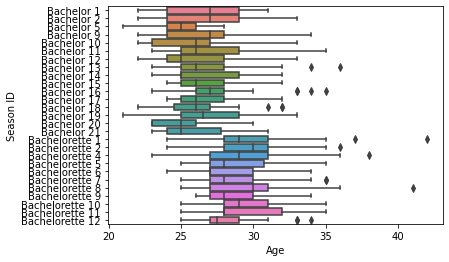

In [76]:
# boxplots of age for each season
sns.boxplot(x=bach['Age'], y=bach['Season ID'], palette = 'husl')

C:\Users\conno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

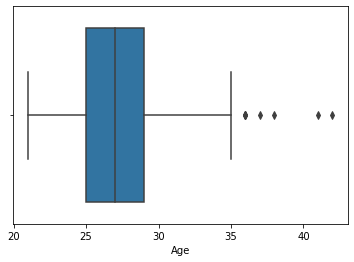

In [77]:
sns.boxplot(bach['Age'])

We then created separate distribution plots of the ages of contestants for "The Bachelor" (female contestants - colored in pink) and "The Bachelorette" (male contestants - colored in blue). Both appear to follow approximately the same distribution (both skewed to the right) with the center of the male (Bachelorette contestants) plot a few years higher.

C:\Users\conno\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\conno\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

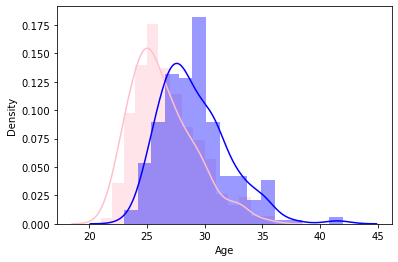

In [78]:
# distplot of contestant ages, colored by bachelor_contestants (females) vs bachelorette_contestants (males)
sns.distplot(a = bachelor_contestants['Age'], color = 'pink')
sns.distplot(a = bachelorette_contestants['Age'], color = 'blue')

Next, we plotted the ages of all of the leads with the female Bachelorette leads colored in pink and the male Bachelor leads colored in blue. The ages of Bachelorette leads all fell on the lower end and were more clustered together while the Bachelor leads had a bit higher average and also a greater spread.

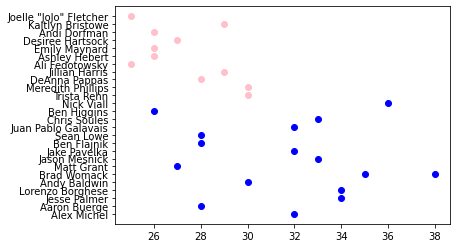

In [79]:
# plot of lead ages, colored by bachelor vs bachelorette
plt.scatter(bachelors['Lead Age'], bachelors['Lead Name'], color = 'blue')
plt.scatter(bachelorettes['Lead Age'], bachelorettes['Lead Name'], color = 'pink')

Next, we plotted a histogram of the absolute value of the age difference between the contestant and lead. This distrubtion ranges from 0 to 15 years and is somewhat skewed to the right.

(array([ 44., 105.,  90.,  80.,  75.,  51.,  48.,  51.,  41.,  36.,  27.,
         21.,  20.,  12.,   3.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 <BarContainer object of 15 artists>)

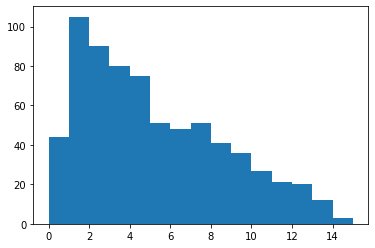

In [80]:
# histogram of age difference
plt.hist(bach['Age Difference'], bins = 15)

To visualize the regional data, we made a bar plot of the counts of contestants from each region. The "Other" category has significantly less values than the others, but that is to be expected as this is a U.S.-based TV franchise. Of the U.S. regions, "South" & "West" have a higher counts than "Northeast" and "Midwest", but the difference is not great enough to raise any concerns.

<BarContainer object of 5 artists>

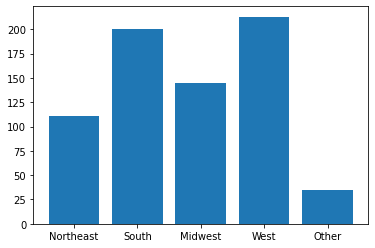

In [81]:
# bar plot of contestant hometown regions
regions = ['Northeast', 'South', 'Midwest', 'West', 'Other']
region_counts = [((bach['Region']=='Northeast').sum()), ((bach['Region']=='South').sum()), 
                 ((bach['Region']=='Midwest').sum()), ((bach['Region']=='West').sum()),
                ((bach['Region']=='Other').sum())]
plt.bar(regions, region_counts)

Finally, we decided to make a word cloud of the occupation data for our contestants. In the next steps of our project, we will be performing text mining to transform the occupation data into a more useful form for modeling. But, in the meantime, we wanted to go ahead and build this word cloud to get an idea of what information may exist within the data. Possible categories that jumped out to us right away included sales/marketing, education, and management/consulting.

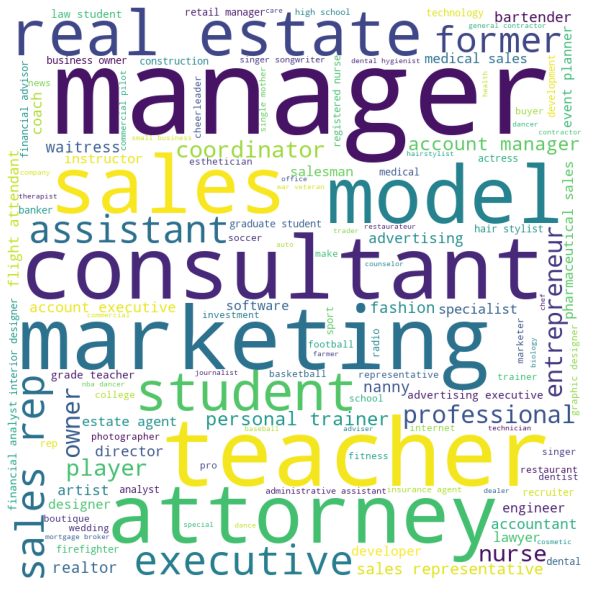

In [82]:
# word cloud of contestant occupation data
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in bach.Occupation:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Data Preparation for Modeling ##

**Training & Testing Datasets**

Our training data comes from seasons 1,2,5 & 9-21 of 'The Bachelor' and seasons 1-12 of 'The Bachelorette'. <br/>
Our testing data comes from the most recent fully completed season of 'The Bachelorette', season 17.

In [83]:
df_train = bach
df_test = pd.read_csv('Season17.csv')

In [84]:
df_train.head()

,Name,Age,Sex,Occupation,City,State,Region,ElimWeek,Season ID,Lead Name,Lead Age,Lead Occupation,Lead City,Lead State,Lead Region,Age Difference,Same Region,age_sex_inter,target
0,Amanda Marsh,23.0,0,Event Planner,Chanute,Kansas,Midwest,NaN,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,9.0,0,0.0,1
1,Trista Rehn,29.0,0,Miami Heat Dancer,Miami,Florida,South,6.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,3.0,1,0.0,0
2,Shannon Oliver,24.0,0,Financial Management Consultant,Dallas,Texas,South,5.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,8.0,1,0.0,0
3,Kim,24.0,0,Nanny,Tempe,Arizona,West,4.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,8.0,0,0.0,0
4,Cathy Grimes,22.0,0,Graduate Student,Terra Haute,Indiana,Midwest,3.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,10.0,0,0.0,0


In [85]:
df_test['Sex'] = 1
df_test['age_sex_inter'] = df_test['Age']*df_test['Sex']

In [86]:
df_test.head()

,Name,Age,Occupation,City,State,Season,Region,Lead Name,Lead Age,Lead City,Lead State,Lead Region,Lead Occupation,Same Region,Age Difference,target,Sex,age_sex_inter
0,Blake Moynes,30,Wildlife Manager,Hamilton,Ontario,17,Other,Katie Thurston,30,Renton,Washington,West,Bank Marketing Manager,0,0,1,1,30
1,Justin Glaze,26,Investment Sales Consultant,Ellicott City,Maryland,17,South,Katie Thurston,30,Renton,Washington,West,Bank Marketing Manager,0,4,0,1,26
2,Greg Grippo,27,Marketing Sales Representative,Edison,New Jersey,17,Northeast,Katie Thurston,30,Renton,Washington,West,Bank Marketing Manager,0,3,0,1,27
3,Michael Allio,36,Business Owner,Akron,Ohio,17,Midwest,Katie Thurston,30,Renton,Washington,West,Bank Marketing Manager,0,6,0,1,36
4,Andrew Spencer,26,Pro Football Player,Lake Villa,Illinois,17,Midwest,Katie Thurston,30,Renton,Washington,West,Bank Marketing Manager,0,4,0,1,26


**Rebalancing the Training Data**

In [87]:
df_train['target'].value_counts()

0    678
1     26
Name: target, dtype: int64

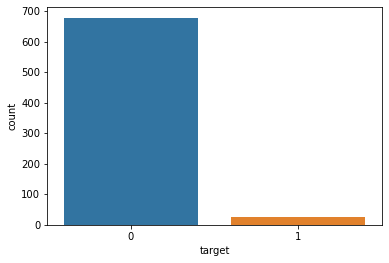

In [88]:
# bar chart of number of observations with each target value in training data
sns.countplot(x = 'target', data = df_train)
plt.show()

Out of the 704 records in our training data, only 26 (3.7%) have a positive value for the target variable. This means that a model could achieve 96.3% accuracy on our dataset just by predicting every contestant as a non-winner. In order to build a more effective model, we decided to rebalance our training data with a higher percentage of positive targets. To get our training data to a 25% positivity rate, we need to resample 200 observations of winners.

In [89]:
to_resample = df_train.loc[df_train['target'] == 1]

In [90]:
our_resample = to_resample.sample(n = 265, replace = True)

In [91]:
df_train_rebal = pd.concat([df_train, our_resample])

In [92]:
df_train_rebal

,Name,Age,Sex,Occupation,City,State,Region,ElimWeek,Season ID,Lead Name,Lead Age,Lead Occupation,Lead City,Lead State,Lead Region,Age Difference,Same Region,age_sex_inter,target
0,Amanda Marsh,23.0,0,Event Planner,Chanute,Kansas,Midwest,NaN,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,9.0,0,0.0,1
1,Trista Rehn,29.0,0,Miami Heat Dancer,Miami,Florida,South,6.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,3.0,1,0.0,0
2,Shannon Oliver,24.0,0,Financial Management Consultant,Dallas,Texas,South,5.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,8.0,1,0.0,0
3,Kim,24.0,0,Nanny,Tempe,Arizona,West,4.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,8.0,0,0.0,0
4,Cathy Grimes,22.0,0,Graduate Student,Terra Haute,Indiana,Midwest,3.0,Bachelor 1,Alex Michel,32.0,Management Consultant,Charlottesville,Virginia,South,10.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,Catherine Giudici,26.0,0,Graphic Designer,Seattle,Washington,West,NaN,Bachelor 17,Sean Lowe,28.0,Entrepreneur,McKinney,Texas,South,2.0,0,0.0,1
176,Melissa Rycroft,25.0,0,Sales Representative,Dallas,Texas,South,NaN,Bachelor 13,Jason Mesnick,33.0,Account Executive,Cleveland,Ohio,Midwest,8.0,0,0.0,1
307,Nikki Ferrell,26.0,0,Pediatric Nurse,Kearney,Missouri,Midwest,NaN,Bachelor 18,Juan Pablo Galavais,32.0,Professional Soccer Player,Miami,Florida,South,6.0,0,0.0,1
334,Whitney Bischoff,29.0,0,Fertility Nurse,Louisville,Kentucky,South,NaN,Bachelor 19,Chris Soules,33.0,Farmer,Arlington,Iowa,Midwest,4.0,0,0.0,1


In [93]:
df_train_rebal['target'].value_counts()

0    678
1    291
Name: target, dtype: int64

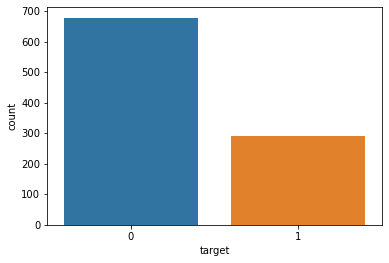

In [94]:
# bar chart of number of observations with each target value in rebalanced training data
sns.countplot(x = 'target', data = df_train_rebal)
plt.show()

## Modeling - Logistic Regression ##

In [95]:
# import packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy import stats
import sklearn.metrics as metrics

**Finalize Train & Test Data**

In [96]:
# drop unnecessary columns from training data
log_data_train = df_train_rebal.drop(columns = ['Name', 'Sex', 'Occupation', 'City', 'State', 'Region', 'Lead Name', 
                                                'Lead Age', 'Lead Occupation', 'Lead City', 'Lead State', 'Lead Region', 
                                                'Season ID', 'ElimWeek'])

In [97]:
log_data_train.head()

,Age,Age Difference,Same Region,age_sex_inter,target
0,23.0,9.0,0,0.0,1
1,29.0,3.0,1,0.0,0
2,24.0,8.0,1,0.0,0
3,24.0,8.0,0,0.0,0
4,22.0,10.0,0,0.0,0


In [98]:
# drop unnecessary columns from testing data
log_data_test = df_test.drop(columns = ['Name', 'Sex', 'Occupation', 'City', 'State', 'Region', 'Lead Name', 'Lead Age', 
                                        'Lead Occupation', 'Lead City', 'Lead State', 'Lead Region', 'Season'])

In [99]:
# reorder columns
log_data_test = log_data_test[['Age', 'Age Difference', 'Same Region', 'age_sex_inter', 'target']]

In [100]:
log_data_test.head()

,Age,Age Difference,Same Region,age_sex_inter,target
0,30,0,0,30,1
1,26,4,0,26,0
2,27,3,0,27,0
3,36,6,0,36,0
4,26,4,0,26,0


**Create & Train Model**

In [101]:
# create instance of logistic regression model
log_model = LogisticRegression()

In [102]:
# split dependent & independent variables in both data sets
X_train = log_data_train.drop('target', axis = 1)
y_train = log_data_train['target']
X_test = log_data_test.drop('target', axis = 1)
y_test = log_data_test['target']

In [103]:
# create regression model
log_model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation ##

**Check Model Against Testing Set**

In [104]:
# get binary predictions of target variable on testing data set
predictions = log_model.predict(X_test)

In [105]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.00      0.00      0.00         1

    accuracy                           0.97        31
   macro avg       0.48      0.50      0.49        31
weighted avg       0.94      0.97      0.95        31



C:\Users\conno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\conno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\conno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
metrics.confusion_matrix(y_test, predictions)

array([[30,  0],
       [ 1,  0]], dtype=int64)

In [107]:
print(stats.describe(predictions))

DescribeResult(nobs=31, minmax=(0, 0), mean=0.0, variance=0.0, skewness=0.0, kurtosis=-3.0)


Despite rebalancing the training data, our model did not classify the target value as 1 for any observations in the testing set. Therefore, we decided to look at the predicted probabilities of each observation being as a winner (target = 1) and sort the contestants by their resulting probabilities. 

In [108]:
# get resulting probabilities from logistic regression for each observation in testing data
probabilities = log_model.predict_proba(X_test)[:,1]

**Sort Observation by Predicted Probability**

In [109]:
df = df_test

In [110]:
df['probability'] = probabilities

In [111]:
df = df.drop(columns = ['Lead Name', 'Lead Age', 'Lead Occupation', 'Lead City', 'Lead State', 'Lead Region', 'Season'])

In [112]:
df = df.sort_values(by = ['probability'], ascending = False)

In [113]:
df

,Name,Age,Occupation,City,State,Region,Same Region,Age Difference,target,Sex,age_sex_inter,probability
30,Marty Hargrove,25,Dancer,Reno,Nevada,West,1,5,0,1,25,0.488926
24,Austin Tinsley,25,Real Estate Investor,Mission Viejo,California,West,1,5,0,1,25,0.488926
7,Aaron Clancy,26,Insurance Agent,Walnut,California,West,1,4,0,1,26,0.462636
20,John Hersey,27,Bartender,Santa Cruz,California,West,1,3,0,1,27,0.436552
18,Thomas Jacobs,28,Real Estate Broker,Poway,California,West,1,2,0,1,28,0.410814
19,Garrett Schwartz,29,Software Marketing Manager,Salinas,California,West,1,1,0,1,29,0.385556
28,Landon Goesling,25,Basketball Coach,Coppell,Texas,South,0,5,0,1,25,0.375121
13,Josh Tylerbest,25,IT Consultant,Pembroke Pines,Florida,South,0,5,0,1,25,0.375121
29,Marcus Lathan,30,Real Estate Broker,Vancouver,Washington,West,1,0,0,1,30,0.360899
9,James Bonsall,30,Software Salesman,La Jolla,California,West,1,0,0,1,30,0.360899


The actual winner of this season, Blake Moynes, received the 6th lowest predicted probability by our model. However, it is interesting to note that the lead of this season, Katie, & Blake have broken up since the end of the show and she is now dating another contestant from the season, John Hersey, who was the 4th highest rated contestant by our model.

## Deployment on Current Season ##

In addition to testing the performance of our model against the most recently completed season, we decided to go a step further by deploying our model on the current season of the Bachelorette which has not completed yet.

**Data Prep**

In [114]:
df_michelle = pd.read_csv('Season18.csv')

In [115]:
df_michelle['Sex'] = 1
df_michelle['age_sex_inter']=df_michelle['Age']*df_michelle['Sex']
df_michelle

,Name,Age,Occupation,City,State,Season,Region,Lead Name,Lead Age,Lead City,Lead State,Lead Region,Lead Occupation,Same Region,Age Difference,Sex,age_sex_inter
0,Alec Thompson,29,Engineer,Charleston,South Carolina,18,South,Michelle Young,28,St. Louis Park,Minnesota,Midwest,Teacher,0,1,1,29
1,Brandon J.,26,Traveling Nurse Recruiter,Portland,Oregon,18,West,Michelle Young,28,St. Louis Park,Minnesota,Midwest,Teacher,0,2,1,26
2,Brandon Kieffer,29,Brand Manager,Austin,Texas,18,South,Michelle Young,28,St. Louis Park,Minnesota,Midwest,Teacher,0,1,1,29
3,Bryan Witzmann,31,NFL Player,Chicago,Illinois,18,Midwest,Michelle Young,28,St. Louis Park,Minnesota,Midwest,Teacher,1,3,1,31
4,Casey Woods,36,Advertising Creative Director,Miami Beach,Florida,18,South,Michelle Young,28,St. Louis Park,Minnesota,Midwest,Teacher,0,8,1,36
5,Christopher Gallant,28,Motivational Speaker,Halifax,Nova Scotia,18,Other,Michelle Young,28,St. Louis Park,Minnesota,Midwest,Teacher,0,0,1,28
6,Chris Sutton,28,Commodities Broker,West Hollywood,California,18,West,Michelle Young,28,St. Louis Park,Minnesota,Midwest,Teacher,0,0,1,28
7,Clayton Echard,28,Sales Rep,Columbia,Missouri,18,Midwest,Michelle Young,28,St. Louis Park,Minnesota,Midwest,Teacher,1,0,1,28
8,Daniel Tully,26,Firefighter,Austin,Texas,18,South,Michelle Young,28,St. Louis Park,Minnesota,Midwest,Teacher,0,2,1,26
9,Edward Naranjo,27,Wellness Coach,Los Angeles,California,18,West,Michelle Young,28,St. Louis Park,Minnesota,Midwest,Teacher,0,1,1,27


In [116]:
log_data_michelle = df_michelle.drop(columns = ['Name', 'Sex', 'Occupation', 'City', 'State', 'Region', 'Lead Name', 
                                                'Lead Age', 'Lead Occupation', 'Lead City', 'Lead State', 'Lead Region', 
                                                'Season'])

In [117]:
log_data_michelle.head()

,Age,Same Region,Age Difference,age_sex_inter
0,29,0,1,29
1,26,0,2,26
2,29,0,1,29
3,31,1,3,31
4,36,0,8,36


**Deploy Model**

In [118]:
pred_michelle = log_model.predict(log_data_michelle)

In [119]:
print(stats.describe(pred_michelle))

DescribeResult(nobs=30, minmax=(0, 1), mean=0.43333333333333335, variance=0.25402298850574706, skewness=0.269069117598525, kurtosis=-1.9276018099547503)


In [120]:
pred_michelle

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0])

Unlike Katie's season, where the model could not identify any contestants that resembled winners, the model predicted over half of Michelle's contestants as potential winners. We again decided to look at the actual predicted probabilities for each contestant and sort them.

In [121]:
prob_michelle = log_model.predict_proba(log_data_michelle)[:,1]

In [122]:
df2 = df_michelle

In [123]:
df2['probability'] = prob_michelle

In [124]:
df2 = df2.drop(columns = ['Lead Name', 'Lead Age', 'Lead Occupation', 'Lead City', 'Lead State', 'Lead Region', 'Season'])

In [125]:
df2 = df2.sort_values(by = ['probability'], ascending = False)

In [126]:
df2

,Name,Age,Occupation,City,State,Region,Same Region,Age Difference,Sex,age_sex_inter,probability
16,LT Murray,38,Yoga Guru,Bellevue,Washington,West,0,10,1,38,0.912179
18,Mollique Johnson,36,Academic Administrator,San Diego,California,West,0,8,1,36,0.849289
4,Casey Woods,36,Advertising Creative Director,Miami Beach,Florida,South,0,8,1,36,0.849289
28,Spencer Williams,25,Financial Crimes Analyst,Cleveland,Ohio,Midwest,1,3,1,25,0.751572
10,Garrett Aida,33,Tech CEO,Salt Lake City,Utah,West,0,5,1,33,0.692491
1,Brandon J.,26,Traveling Nurse Recruiter,Portland,Oregon,West,0,2,1,26,0.630782
14,Jomarri Gable,26,Personal Trainer,Fresno,California,West,0,2,1,26,0.630782
22,Peter Izzo,26,Entreprenuer,Port St. Joe,Florida,South,0,2,1,26,0.630782
8,Daniel Tully,26,Firefighter,Austin,Texas,South,0,2,1,26,0.630782
26,Romeo Alexander,32,Mathematician,New York City,New York,Northeast,0,4,1,32,0.623878


At the time of the comletion of this project, Michelle's season was down to it's final 3 contestants: Brandon J., Nayte Olukoya & Joe Coleman. Our model predicted these contestants as having, respectively, the 6th, 15th, & 28th highest probabilities of being the selected winner.